# Ejercicio de Regresión 1 (Core)


### Objetivo

Aplicar los conceptos de regresión lineal para resolver un problema práctico utilizando Python.

### Descripción del problema: 

Supongamos que trabajas en una empresa que desea predecir el precio de venta de casas en función de varias características. Tienes un conjunto de datos con información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). Tu tarea es construir un modelo de regresión lineal que pueda predecir el precio de venta de una casa dada.

### Instrucciones:

1. **Carga de datos:** Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
   * SqFt: Tamaño de la casa en pies cuadrados.
   * Bedrooms: Número de habitaciones.
   * Bathrooms: Número de baños.
   * price: Precio de venta de la casa.
2. **Exploración de datos:** Realiza un análisis exploratorio de los datos para entender su estructura 
   y detectar posibles problemas como valores nulos o outliers.
3. **Preparación de datos:** Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
4. **Entrenamiento del modelo:** Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
5. **Evaluación del modelo:** Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático 
   medio (MSE) y el R-cuadrado (R²) del modelo.
6. **Predicción:** Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
   * Tamaño: 2000 pies cuadrados
   * Habitaciones: 3
   * Baños: 2

### 1. **Carga de datos:** 
Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
   * SqFt: Tamaño de la casa en pies cuadrados.
   * Bedrooms: Número de habitaciones.
   * Bathrooms: Número de baños.
   * price: Precio de venta de la casa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Cargar datos desde un archivo CSV
df = pd.read_csv(r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_2_machine_learning\ml_tareas_core_bootcamp\1_ejercicio_de_regresion\data\house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


### 2. **Exploración de datos:**
Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.


In [3]:
df.info() # Verifica tipos de datos 
df.describe()  # Estadísticas descriptivas
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')


In [4]:
# Obtener los valores únicos de todas las columnas
unique_values = df.apply(lambda x: x.unique())

# Mostrar los valores únicos
print(unique_values)

Home            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Price           [114300, 114200, 114800, 94700, 119800, 114600...
SqFt            [1790, 2030, 1740, 1980, 2130, 1780, 1830, 216...
Bedrooms                                             [2, 4, 3, 5]
Bathrooms                                               [2, 3, 4]
Offers                                         [2, 3, 1, 4, 5, 6]
Brick                                                   [No, Yes]
Neighborhood                                  [East, North, West]
dtype: object


In [5]:
data_dict = {
    'Home': 'int64', 
    'Price': 'int64', 
    'SqFt': 'int64', 
    'Bedrooms': 'int64',
    'Bathrooms': 'int64',
    'Offers': 'int64',
    'Brick': 'bool',
    'Neighborhood': 'category'
}
# Mapear los valores de la columna 'Brick'
df['Brick'] = df['Brick'].map({'Yes': True, 'No': False})
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Home          128 non-null    int64   
 1   Price         128 non-null    int64   
 2   SqFt          128 non-null    int64   
 3   Bedrooms      128 non-null    int64   
 4   Bathrooms     128 non-null    int64   
 5   Offers        128 non-null    int64   
 6   Brick         128 non-null    bool    
 7   Neighborhood  128 non-null    category
dtypes: bool(1), category(1), int64(6)
memory usage: 6.5 KB


In [6]:
# Obtener los valores únicos de todas las columnas
unique_values = df.apply(lambda x: x.unique())

# Mostrar los valores únicos
print(unique_values)


Home            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Price           [114300, 114200, 114800, 94700, 119800, 114600...
SqFt            [1790, 2030, 1740, 1980, 2130, 1780, 1830, 216...
Bedrooms                                             [2, 4, 3, 5]
Bathrooms                                               [2, 3, 4]
Offers                                         [2, 3, 1, 4, 5, 6]
Brick                                               [False, True]
Neighborhood    ['East', 'North', 'West']
Categories (3, objec...
dtype: object


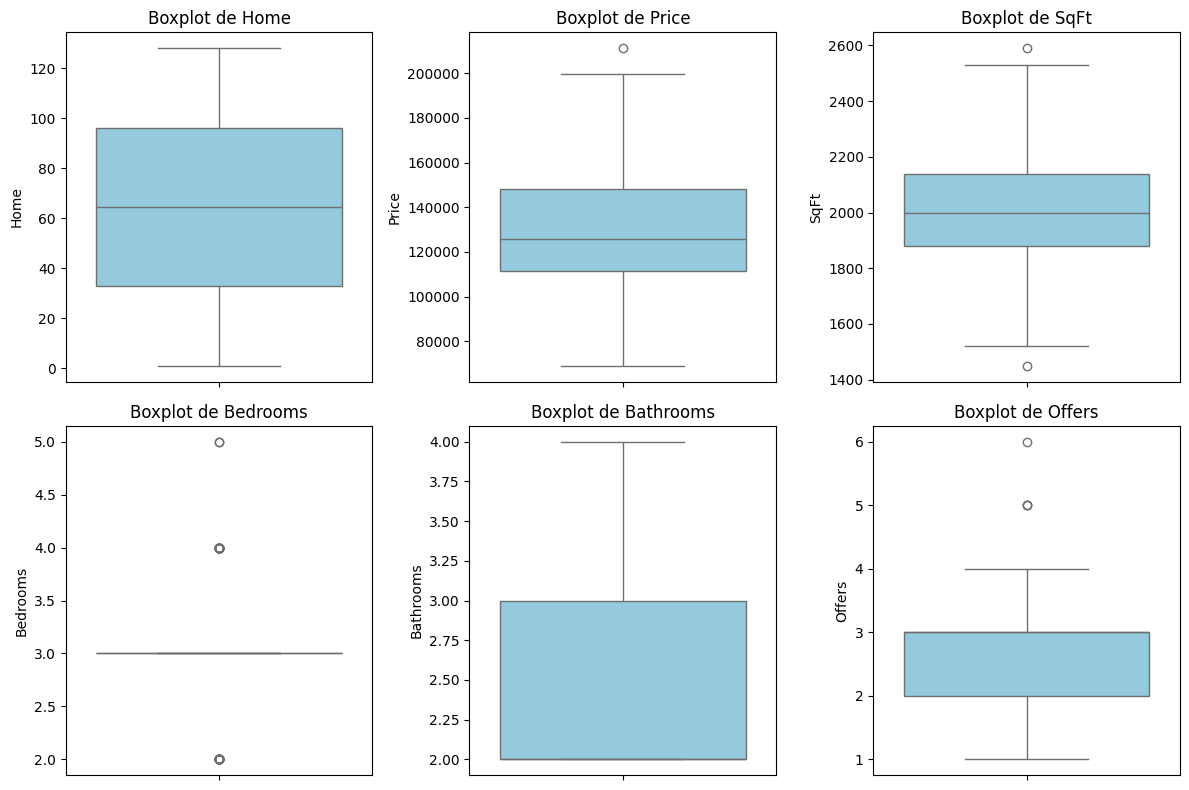

In [7]:
# Crear una figura y una cuadrícula de subplots 
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # filas y columnas
numerical_columns = ['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
# Crear un boxplot para cada columna en la cuadrícula de subplots
for i, column in enumerate(numerical_columns):
    row = i // 3  # Fila de la cuadrícula
    col = i % 3   # Columna de la cuadrícula
    sns.boxplot(y=df[column], ax=axes[row, col], color='skyblue')  
    axes[row, col].set_title(f'Boxplot de {column}')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

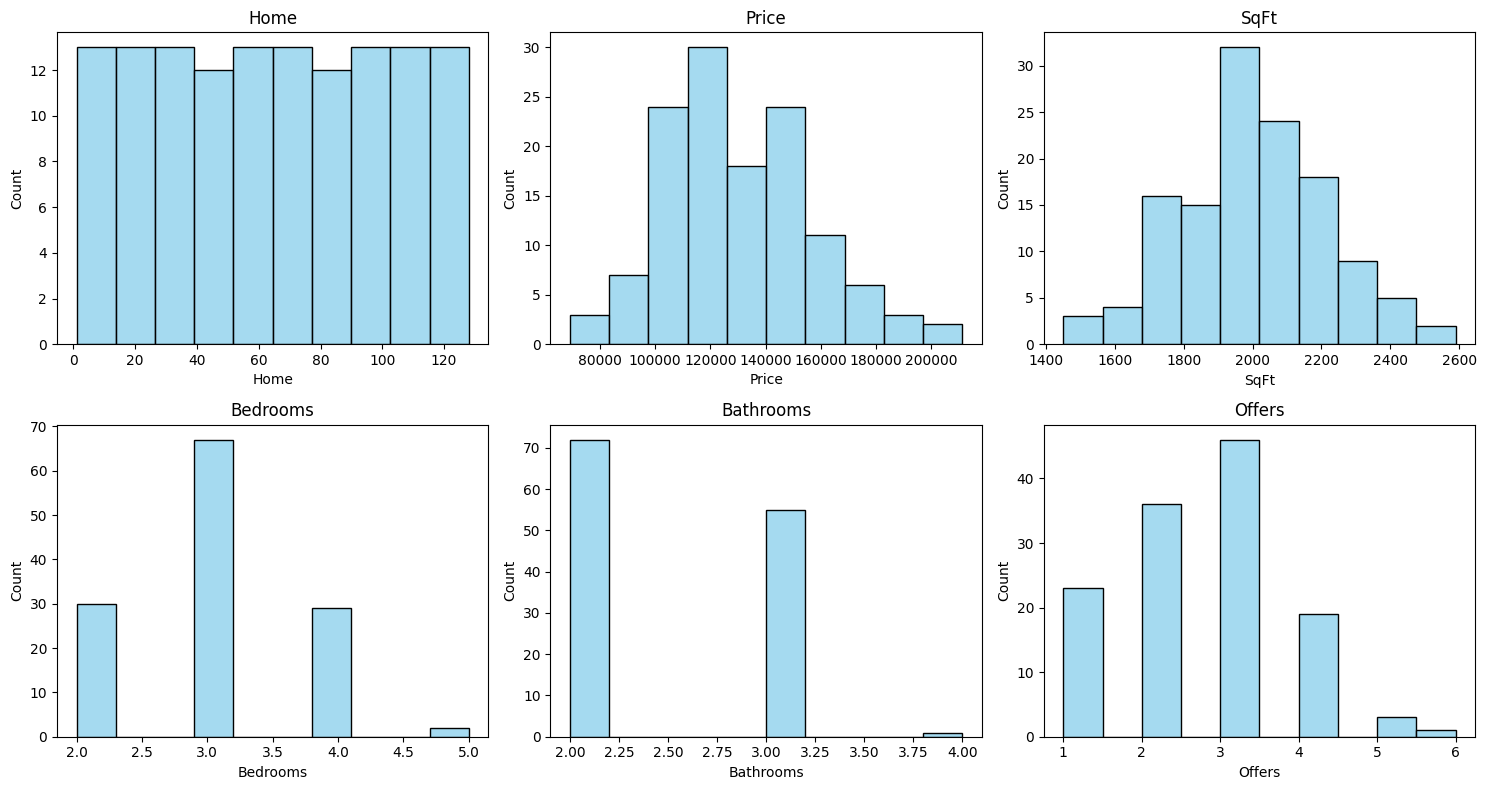

In [8]:
# Crear una figura y una cuadrícula de subplots 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 filas y 3 columnas

# Crear un gráfico para cada columna en la cuadrícula de subplots
for i, column in enumerate(numerical_columns):
    row = i // 3  # Fila de la cuadrícula
    col = i % 3   # Columna de la cuadrícula
    sns.histplot(df[column], bins=10, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(column)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

In [9]:
#Verificar Valores Nulos
from utils import calculate_null
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
Home,128,0,0.0
Price,128,0,0.0
SqFt,128,0,0.0
Bedrooms,128,0,0.0
Bathrooms,128,0,0.0
Offers,128,0,0.0
Brick,128,0,0.0
Neighborhood,128,0,0.0


In [10]:
#Importamos la función para detectar outliers por iqr
from utils import detect_outliers_iqr 
# Identify numerical columns/Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers/ Crear un Dataframe resumido de outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T


,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Home,0.0,0.00000,1.0,128.0
Price,1.0,0.78125,69100.0,199500.0
SqFt,2.0,1.56250,1520.0,2530.0
Bedrooms,61.0,47.65625,3.0,3.0
Bathrooms,0.0,0.00000,2.0,4.0
Offers,4.0,3.12500,1.0,4.0


In [11]:
df[numerical_columns].describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


### 3. **Preparación de datos:** 
Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
# División en conjunto de entrenamiento y prueba (70-30)
X = df[['SqFt', 'Bedrooms', 'Bathrooms','Offers']]  # Corregido para seleccionar múltiples columnas
y = df['Price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluación del modelo en conjunto de prueba
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 13306.498262821717
Error cuadrático medio (MSE): 253234019.1735968
Coeficiente de determinación (R²): 0.5703520599694544


In [14]:
# Cargar tus datos (el DataFrame df ya lo tienes)
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']]
y = df['Price']

# Definir las columnas numéricas y categóricas
numeric_features = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick']  # Brick es numérica
categorical_features = ['Neighborhood']

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputación de valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding para variables categóricas
])

# Crear un ColumnTransformer para aplicar diferentes transformaciones a las columnas
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear un Pipeline completo que incluye el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Utilizamos regresión lineal para predecir el precio
])

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





### 4. **Entrenamiento del modelo:** 
Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.


In [15]:

# Ajustar el Pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones utilizando el modelo ajustado
y_pred = pipeline.predict(X_test)

### 5. **Evaluación del modelo:** 
Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.


In [16]:
# Evaluación del modelo en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 8901.29
Error cuadrático medio (MSE): 114170418.45
Coeficiente de determinación (R²): 0.81


### 6. **Predicción:** 
Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
   * Tamaño: 2000 pies cuadrados
   * Habitaciones: 3
   * Baños: 2

In [17]:
# Características de la casa
input_data = {
    'SqFt': [2000],
    'Bedrooms': [3],
    'Bathrooms': [2],
    'Offers': [0],  # Suponiendo que no hay oferta especial
    'Brick': [1],   # Suponiendo que la casa es de ladrillo
    'Neighborhood': ['Suburb']  # Asegúrate de que coincida con el nombre del vecindario en tu conjunto de datos
}

# Convertir las características a un DataFrame
input_df = pd.DataFrame(input_data)

# Realizar la predicción utilizando el pipeline ya entrenado
predicted_price = pipeline.predict(input_df)

# Mostrar el precio estimado
print(f"El precio estimado de la casa es: ${predicted_price[0]:,.2f}")

El precio estimado de la casa es: $161,301.08
